# Histogram of the number of particles in each dataset

The dataset and the corresponding module are placed at `dataset` and `source/data` respectively.

In [1]:
import os
import sys

import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import numpy as np
import seaborn as sns
import tqdm

sys.path.append(os.path.abspath('../'))

from source.data import jetclass
from source.data import jetnet
from source.data import topqcd

sns.set_theme()

In [2]:
def events_num_ptcs_hist(x: np.ndarray, bins: int, ax: plt.Axes, title: str = None, density: bool = False):
    """Histogram of the number of particles in each event."""

    if density:
        # Set the y-axis formatter to scientific notation.
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    else:
        # Set the y-axis formatter to thousands.
        y_axis_formatter = lambda y, pos: f"{int(y / 1000)}K"
        ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
    
    # The 0-th column plots the total overlapped histogram.
    pdf, _, _ = ax.hist(
        x=x,
        bins=bins,
        alpha=0.6,
        density=density,
    )

    # Set the title of the plot.
    if title is not None:
        ax.set_title(title)

### Jet Class Dataset

Jet Class Dataset:   0%|          | 0/10 [00:00<?, ?it/s]

Jet Class Dataset:  10%|█         | 1/10 [00:19<02:53, 19.28s/it]

Max number of particles in HToBB: 133


Jet Class Dataset:  20%|██        | 2/10 [00:36<02:26, 18.26s/it]

Max number of particles in HToCC: 129


Jet Class Dataset:  30%|███       | 3/10 [01:01<02:28, 21.20s/it]

Max number of particles in HToGG: 147


Jet Class Dataset:  40%|████      | 4/10 [01:15<01:49, 18.23s/it]

Max number of particles in HToWW2Q1L: 121


Jet Class Dataset:  50%|█████     | 5/10 [01:39<01:42, 20.46s/it]

Max number of particles in HToWW4Q: 142


Jet Class Dataset:  60%|██████    | 6/10 [02:04<01:28, 22.07s/it]

Max number of particles in TTBar: 152


Jet Class Dataset:  70%|███████   | 7/10 [02:19<00:59, 19.68s/it]

Max number of particles in TTBarLep: 150


Jet Class Dataset:  80%|████████  | 8/10 [02:36<00:37, 18.84s/it]

Max number of particles in WToQQ: 125


Jet Class Dataset:  90%|█████████ | 9/10 [02:55<00:18, 18.89s/it]

Max number of particles in ZJetsToNuNu: 166


Jet Class Dataset: 100%|██████████| 10/10 [03:13<00:00, 19.33s/it]

Max number of particles in ZToQQ: 128


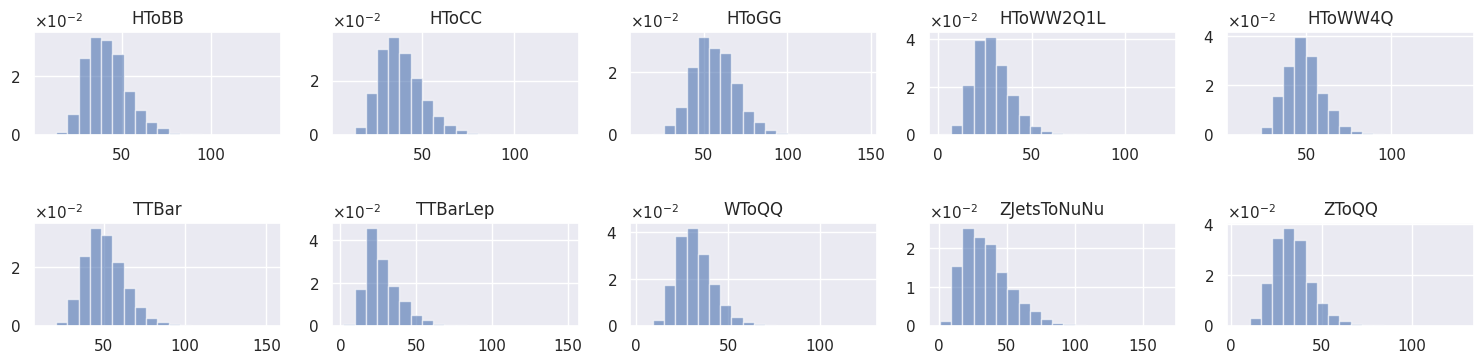

In [6]:
num_row = 2
num_col = 5
fig, ax = plt.subplots(num_row, num_col, figsize=(3 * num_col, 2 * num_row))

for i, channel in enumerate(tqdm.tqdm(jetclass.channels, desc='Jet Class Dataset')):

    # Get the jet events.
    jet_events = jetclass.JetEvents(channel, num_root=10)
    print(f"Max number of particles in {channel}: {max(jet_events.num_ptcs)}")

    # Plot the histogram.
    events_num_ptcs_hist(
        x=ak.to_numpy(jet_events.num_ptcs),
        bins=20,
        ax=ax[i // num_col, i % num_col],
        title=channel,
        density=True,
    )

plt.tight_layout()

### Top QCD Dataset

Top QCD Dataset:   0%|          | 0/2 [00:00<?, ?it/s]

Max number of particles in top (train): 160
Max number of particles in top (valid): 146


Top QCD Dataset:  50%|█████     | 1/2 [00:14<00:14, 14.59s/it]

Max number of particles in top (test): 165
Max number of particles in qcd (train): 160
Max number of particles in qcd (valid): 156


Top QCD Dataset: 100%|██████████| 2/2 [00:29<00:00, 14.59s/it]

Max number of particles in qcd (test): 153


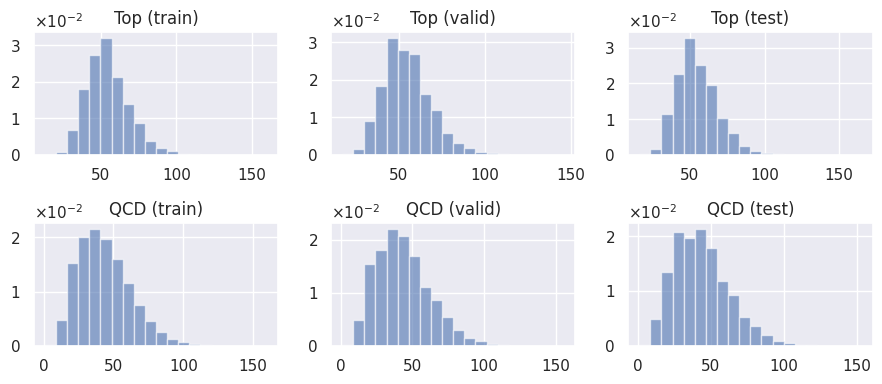

In [4]:
num_row = 2
num_col = 3
fig, ax = plt.subplots(num_row, num_col, figsize=(3 * num_col, 2 * num_row))

for i, channel in enumerate(tqdm.tqdm(topqcd.channels, desc='Top QCD Dataset')):
    for j, mode in enumerate(['train', 'valid', 'test']):
        # Get the jet events.
        jet_events = topqcd.JetEvents(channel, mode)
        print(f"Max number of particles in {channel} ({mode}): {max(jet_events.num_ptcs)}")

        # Plot the histogram.
        events_num_ptcs_hist(
            x=ak.to_numpy(jet_events.num_ptcs),
            bins=20,
            ax=ax[i, j],
            title=f"{'Top' if channel == 'top' else 'QCD'} ({mode})",
            density=True,
        )

plt.tight_layout()

### Jet Net Dataset

Jet Class Dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Jet Class Dataset:  20%|██        | 1/5 [00:00<00:00,  5.12it/s]

Max number of particles in q: 30.0


Jet Class Dataset:  40%|████      | 2/5 [00:00<00:00,  4.88it/s]

Max number of particles in g: 30.0


Jet Class Dataset:  60%|██████    | 3/5 [00:00<00:00,  4.80it/s]

Max number of particles in t: 30.0
Max number of particles in w: 30.0


Jet Class Dataset: 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

Max number of particles in z: 30.0


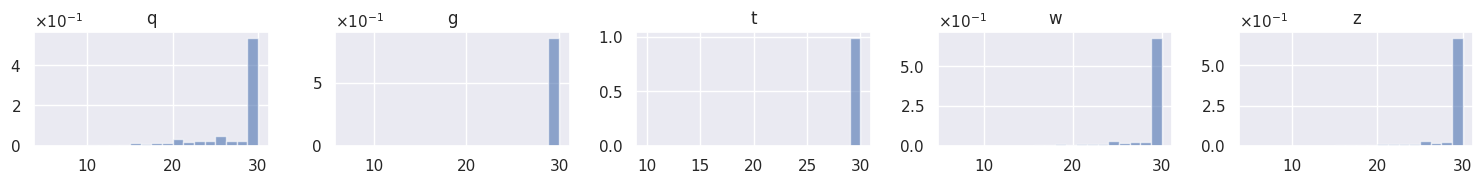

In [5]:
num_row = 1
num_col = 5
fig, ax = plt.subplots(num_row, num_col, figsize=(3 * num_col, 2 * num_row))

for i, channel in enumerate(tqdm.tqdm(jetnet.channels, desc='Jet Class Dataset')):

    # Get the jet events.
    jet_events = jetnet.JetEvents(channel)
    print(f"Max number of particles in {channel}: {max(jet_events.num_ptcs)}")

    # Plot the histogram.
    events_num_ptcs_hist(
        x=ak.to_numpy(jet_events.num_ptcs),
        bins=20,
        ax=ax[i],
        title=channel,
        density=True,
    )

plt.tight_layout()